**Poojitha Konduparti**

Image generation (synthesis) is the task of generating new images from an existing dataset.

Unconditional generation refers to generating samples unconditionally from the dataset, i.e. 
Conditional image generation (subtask) refers to generating samples conditionally from the dataset, based on a label

In this notebook, we will be exploring Autoencoders, VAEs and GANs to generate images on the Fashion MNIST Dataset

## Autoencoders

Autoencoders are simple neural networks that their output is their input. Simple as that. Their goal is to learn how to reconstruct the input-data. But how is it helpful? The trick is their structure. The first part of the network is what we refer to as the Encoder. It receives the input and it encodes it in a latent space of a lower dimension. The second part (the Decoder) takes that vector and decode it in order to produce the original input.

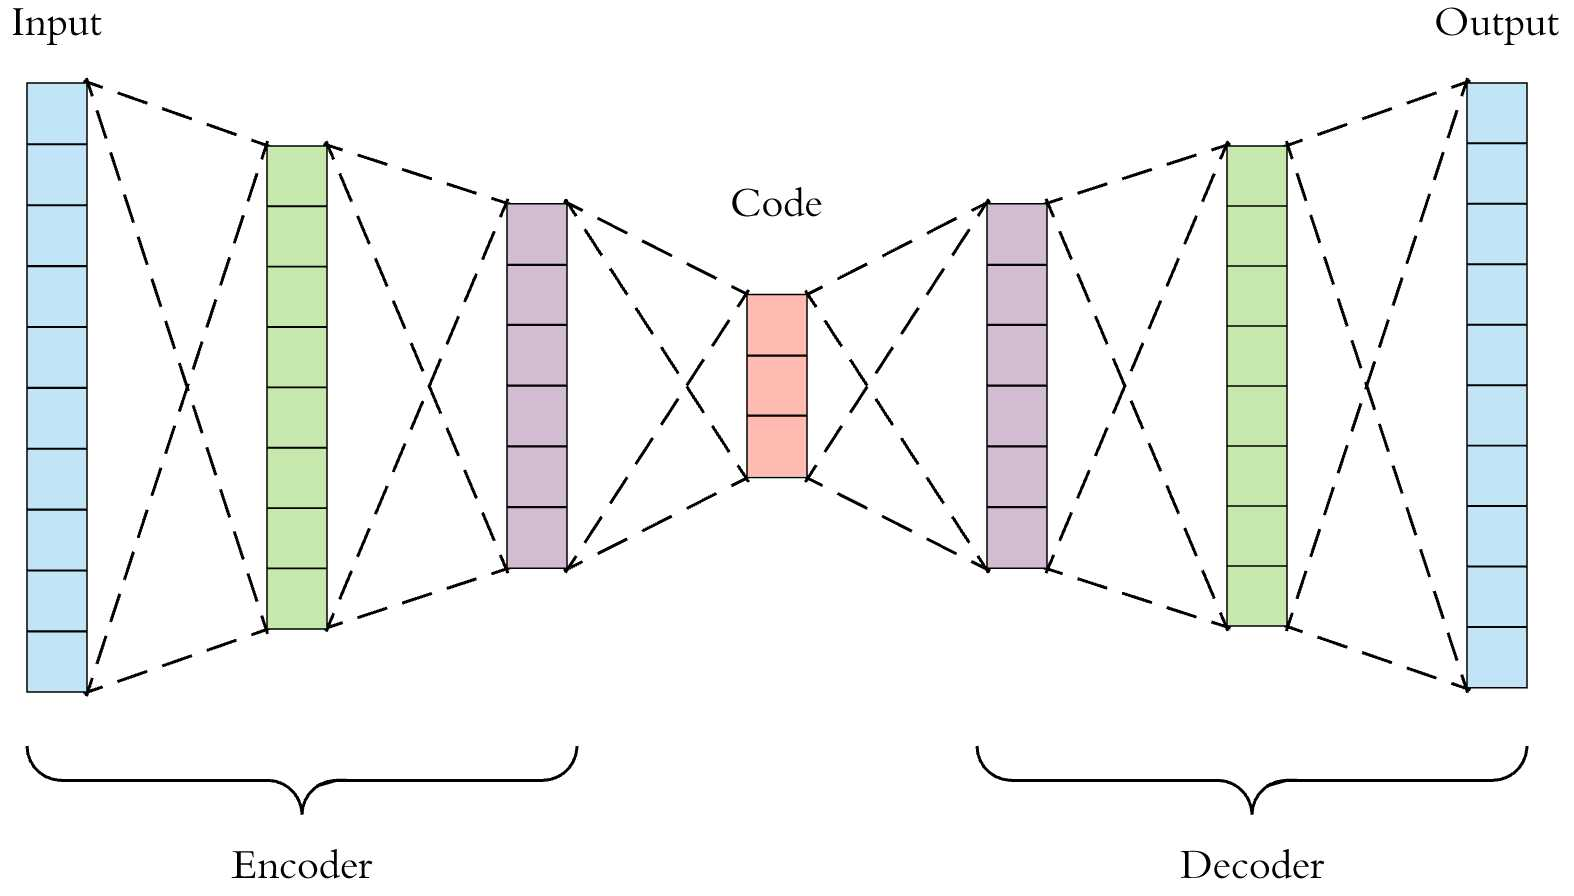

In [1]:
import tensorflow as tf
from google.colab import drive

4422102/4422102 [==============================] - 0s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


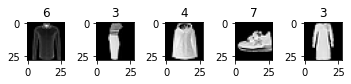

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import fashion_mnist
 
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testy.shape))
 
for j in range(5):
    i = np.random.randint(0, 10000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

These images are 2-D NumPy arrays filled with pixel intensities. We will convert each image into a single dimensional array as we want to pass it into a Multi-layer perceptron model. (Ideally, we should have used Convolutional Neural Network-based autoencoder which is ideal for images).

In [3]:
# normalizing pixel intensities
trainX = trainX/255
testX = testX/255
#reshaping data into single dimension
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000, 28*28))
print (train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


#Encoder

In [4]:
import tensorflow
 
input_data = tensorflow.keras.layers.Input(shape=(784))
 
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
 
encoded = tensorflow.keras.layers.Dense(2)(encoder)

#Decoder

In [5]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
 
decoded = tensorflow.keras.layers.Dense(784)(decoder)

In [6]:
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0     

#Training

In [7]:
autoencoder.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data, test_data))


Epoch 1/30
938/938 [==============================] - 9s 6ms/step - loss: 0.0386 - val_loss: 0.0318
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0306 - val_loss: 0.0300
Epoch 3/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0292 - val_loss: 0.0289
Epoch 4/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0283 - val_loss: 0.0280
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0279 - val_loss: 0.0283
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0275 - val_loss: 0.0271
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0271 - val_loss: 0.0270
Epoch 8/30
938/938 [==============================] - 3s 4ms/step - loss: 0.0271 - val_loss: 0.0266
Epoch 9/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0268 - val_loss: 0.0265
Epoch 10/30
938/938 [==============================] - 3s 3ms/step - loss: 0.0267 - val_loss: 0.0264

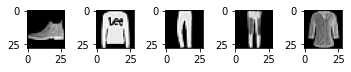

1/1 [==============================] - 0s 15ms/step


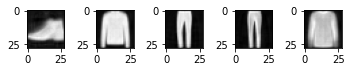

In [8]:
# Real Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap='gray')
plt.show()
 
# Reconstructed Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()

In [11]:
dr_model = tf.keras.models.Model(inputs=autoencoder.get_layer('input_1').input, outputs=autoencoder.get_layer('dense_6').output)
dr_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0   

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step


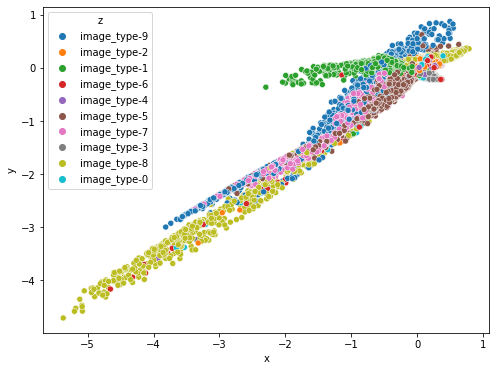

In [12]:
x = []
y = []
z = []
for i in range(10000):
    z.append(testy[i])
    op = dr_model.predict(np.array([test_data[i]]))
    x.append(op[0][0])
    y.append(op[0][1])
 
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = ["image_type-"+str(k) for k in z]
 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='z', data=df)
plt.show()

In [13]:
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import fashion_mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np

In [14]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
x_train = pd.read_csv('drive/My Drive/Colab Notebooks/Fashion MNIST/fashion-mnist_train.csv')
x_test = pd.read_csv('drive/My Drive/Colab Notebooks/Fashion MNIST/fashion-mnist_test.csv')

In [16]:
y_train = x_train.pop('label')
y_test = x_test.pop('label')

x_train = np.array(x_train).reshape(-1, 28, 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28, 28) / 255.0

# Changing Network Architecture

Buildung a CNN based autoencoder to perform dimensionality reduction on the fashion mnist dataset. First we'll load the training and test set and display a few of the images



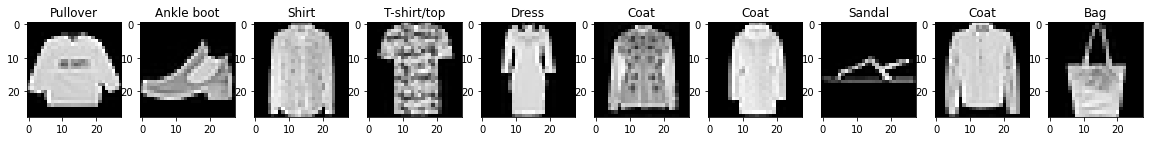

In [17]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(labeldict[y_train[i]])

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def make_and_fit():
    inputs = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(2, activation='relu')(x)

    encoder = Model(inputs=inputs, outputs=encoded)
    
    encoded_inputs = Input(shape=(2,))

    x = Dense(4, activation='relu')(encoded_inputs)
    x = Reshape((2, 2, 1))(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((7, 7))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = Model(inputs=encoded_inputs, outputs=decoded)
    
    x = encoder(inputs)
    x = decoder(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

    print(model.summary())
    
    clr = ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=3,
        min_delta=0.01,
        cooldown=0,
        min_lr=1e-7,
        verbose=1)

    model.fit(
        x_train,
        x_train,
        batch_size=256,
        epochs=50,
        shuffle=True,
        validation_data=(x_test, x_test),
        callbacks=[clr])

    return model, encoder, decoder

model, encoder, decoder = make_and_fit()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model_3 (Functional)        (None, 2)                 34889     
                                                                 
 model_4 (Functional)        (None, 28, 28, 1)         42417     
                                                                 
Total params: 77,306
Trainable params: 77,082
Non-trainable params: 224
_________________________________________________________________
None
Epoch 1/50
235/235 [==============================] - 16s 37ms/step - loss: 0.4135 - accuracy: 0.4867 - mse: 0.0592 - val_loss: 0.7835 - val_accuracy: 0.5026 - val_mse: 0.1575 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - 8s 33ms/step - loss: 0.3550 - accuracy: 0.4952 - mse: 0.0389 - val_lo

1/1 [==============================] - 0s 23ms/step


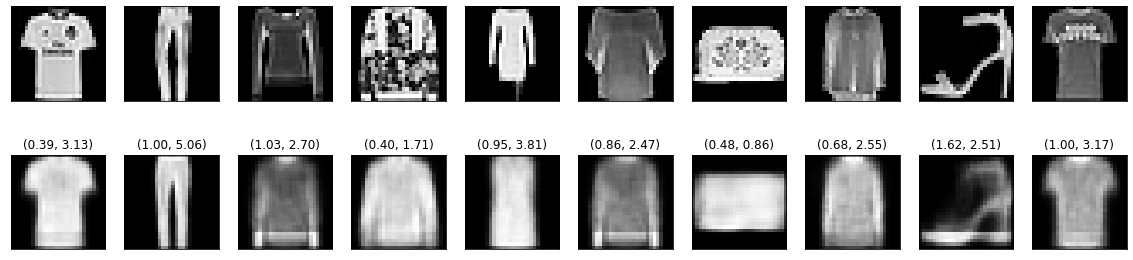

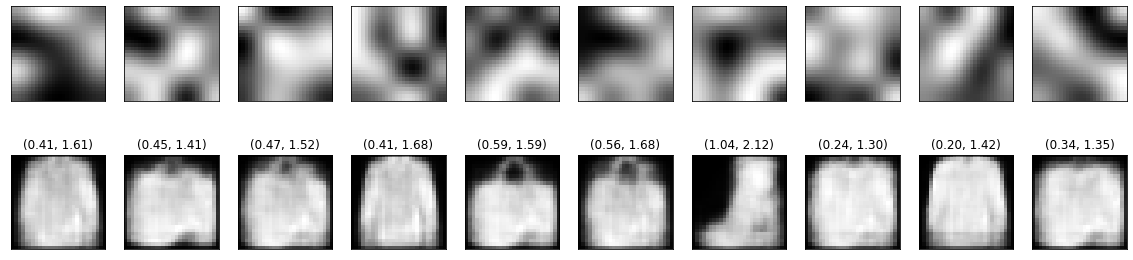

In [19]:
def get_triple(inputs):
    latent_repr = encoder.predict(inputs)
    outputs = decoder.predict(latent_repr)
    latent_repr = latent_repr.reshape((latent_repr.shape[0], latent_repr.shape[1], 1))

    return inputs, latent_repr, outputs

def show_encodings(inputs, latent_repr, outputs):
    n = len(inputs)
    fig, axes = plt.subplots(2, n, figsize=(2*n, 5))
    for i in range(n):
        axes[1, i].set_title('({0:.2f}, {1:.2f})'.format(float(latent_repr[i, 0]), float(latent_repr[i, 1])))
        axes[0, i].imshow(inputs[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
show_encodings(*get_triple(x_test[:10]))
inputs = np.random.random(size=(10, 4, 4, 1))
inputs = scipy.ndimage.zoom(inputs, (1, 7, 7, 1))
show_encodings(*get_triple(inputs))

313/313 [==============================] - 1s 2ms/step


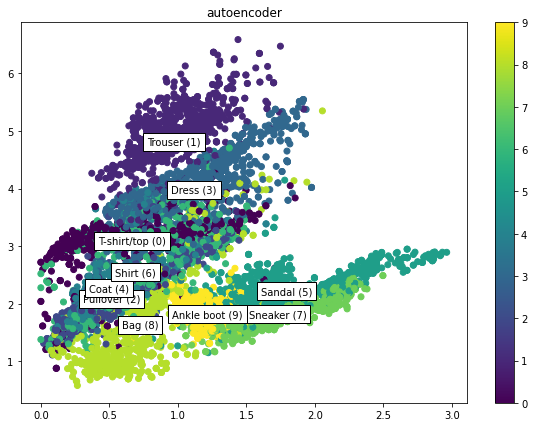

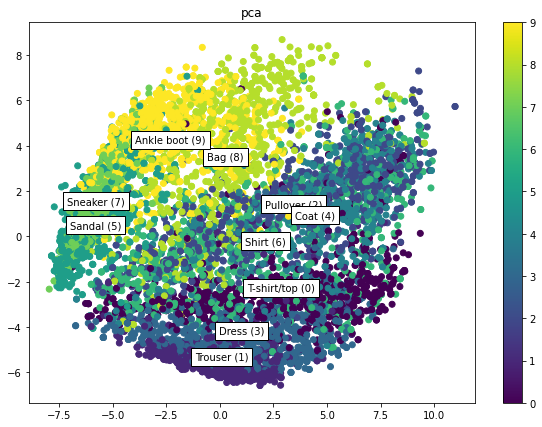

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


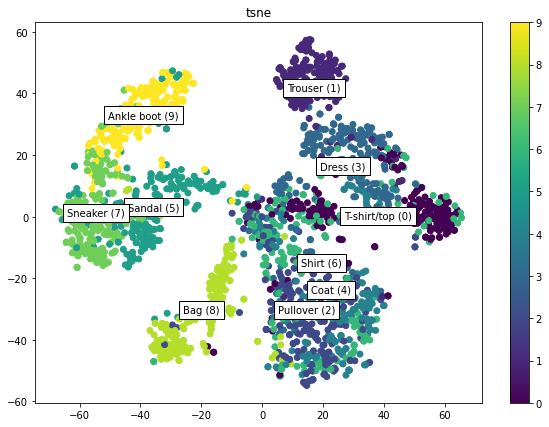

10/10 [==============================] - 0s 14ms/step


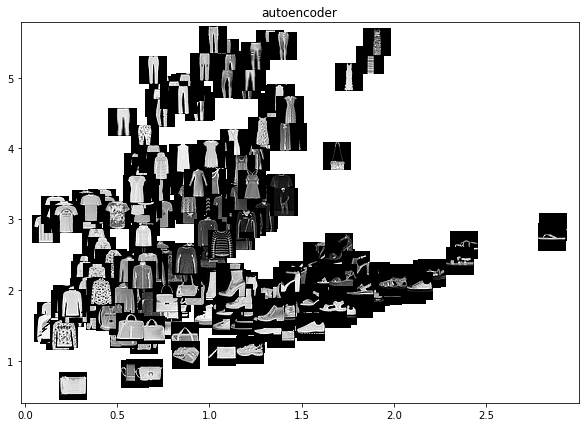

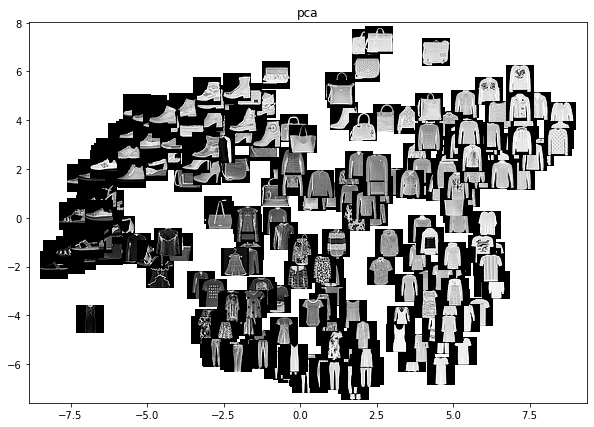

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


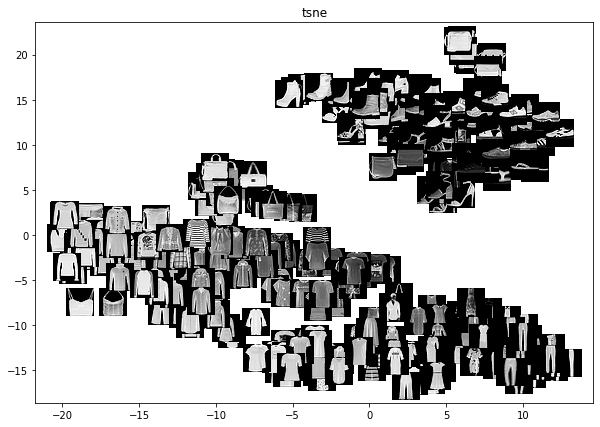

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_latent(mode, count, technique):
    idx = np.random.choice(len(x_test), count)
    inputs = x_test[idx]
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(technique)
    if technique == 'autoencoder':
        coords = encoder.predict(inputs)
    elif technique == 'pca':
        coords = PCA(n_components=2).fit_transform(inputs.reshape(count, -1))
    elif technique == 'tsne':
        coords = TSNE(n_components=2).fit_transform(inputs.reshape(count, -1))

    if mode == 'imgs':
        for image, (x, y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
            ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
    elif mode == 'dots':
        classes = y_test[idx]
        plt.scatter(coords[:, 0], coords[:, 1], c=classes)
        plt.colorbar()
        for i in range(10):
            class_center = np.mean(coords[classes == i], axis=0)
            text = TextArea('{} ({})'.format(labeldict[i], i))
            ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
            ax.add_artist(ab)
    plt.show()

plot_latent('dots', 10000, 'autoencoder')
plot_latent('dots', 10000, 'pca')
plot_latent('dots', 2000, 'tsne')

plot_latent('imgs', 300, 'autoencoder')
plot_latent('imgs', 300, 'pca')
plot_latent('imgs', 300, 'tsne')

## VAE

Variational Autoencoder works by making the latent space more predictable, more continuous, less sparse. By forcing latent variables to become normally distributed, VAEs gain control over the latent space.

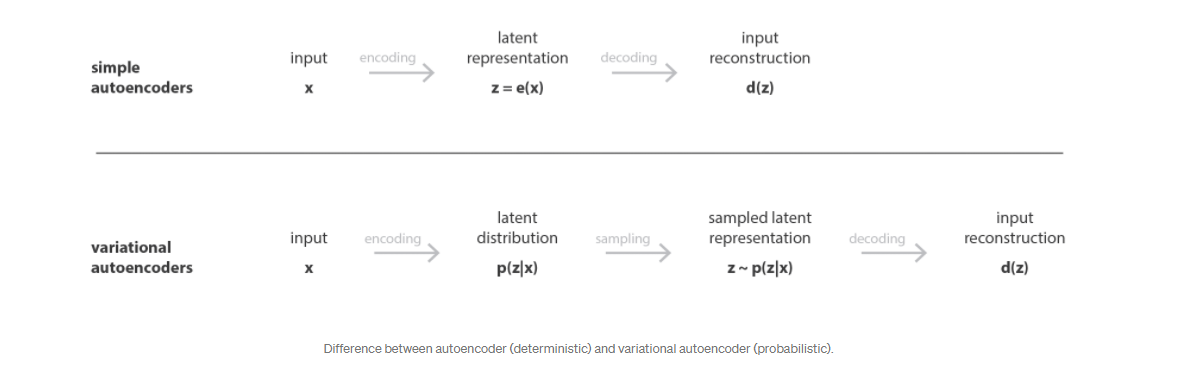

In [69]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf; tf.compat.v1.disable_eager_execution()
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.datasets import mnist
np.random.seed(25)
tf.executing_eagerly()

False

In [70]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


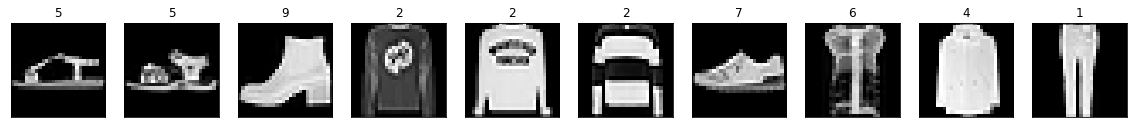

In [23]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 7))
counter = 0
for i in range(120, 130):
    axes[counter].set_title(y_train[i])
    axes[counter].imshow(X_train[i], cmap='gray')
    axes[counter].get_xaxis().set_visible(False)
    axes[counter].get_yaxis().set_visible(False)
    counter += 1
plt.show()

In [24]:
X_train = X_train/255
X_test = X_test/255

In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [27]:
print(X_train_new.shape)
print(X_test_new.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [28]:
img_height   = X_train_new.shape[1]    # 28
img_width    = X_train_new.shape[2]    # 28
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim = 2    # Dimension of the latent space

In [29]:
encoder_input = Input(shape=input_shape)

encoder_conv = Conv2D(filters=8, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=16, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

In [30]:
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

In [31]:
latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

In [32]:
conv_shape = K.int_shape(encoder_conv)


In [33]:
conv_shape = K.int_shape(encoder_conv)
conv_shape

(None, 14, 14, 16)

In [34]:
decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)
decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)

In [80]:
encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)

In [36]:
vae = Model(encoder_input, decoder(encoder(encoder_input)))


In [37]:
def kl_reconstruction_loss(true, pred):
    # Reconstruction loss
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height
    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

In [38]:
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)


In [39]:
history = vae.fit(x=X_train_new, y=X_train_new, epochs=20, batch_size=32, validation_data=(X_test_new,X_test_new))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59744/60000 [============================>.] - ETA: 0s - loss: 301.2790

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 8s 140us/sample - loss: 301.2028 - val_loss: 281.3655
Epoch 2/20
60000/60000 [==============================] - 12s 197us/sample - loss: 277.6411 - val_loss: 277.4170
Epoch 3/20
60000/60000 [==============================] - 8s 133us/sample - loss: 274.7822 - val_loss: 275.2944
Epoch 4/20
60000/60000 [==============================] - 8s 131us/sample - loss: 273.4063 - val_loss: 274.8806
Epoch 5/20
60000/60000 [==============================] - 11s 186us/sample - loss: 272.6127 - val_loss: 273.8877
Epoch 6/20
60000/60000 [==============================] - 8s 129us/sample - loss: 272.0839 - val_loss: 273.5745
Epoch 7/20
60000/60000 [==============================] - 8s 133us/sample - loss: 271.6790 - val_loss: 273.3958
Epoch 8/20
60000/60000 [==============================] - 8s 136us/sample - loss: 271.2879 - val_loss: 272.7743
Epoch 9/20
60000/60000 [==============================] - 8s 136us/sample - loss: 270.8775 - val_loss: 272.5112
E

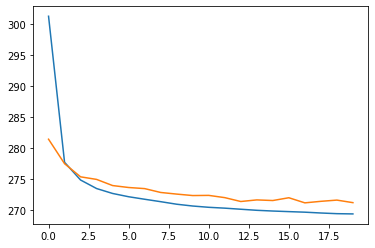

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [41]:
encoded = encoder.predict(X_train_new)


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


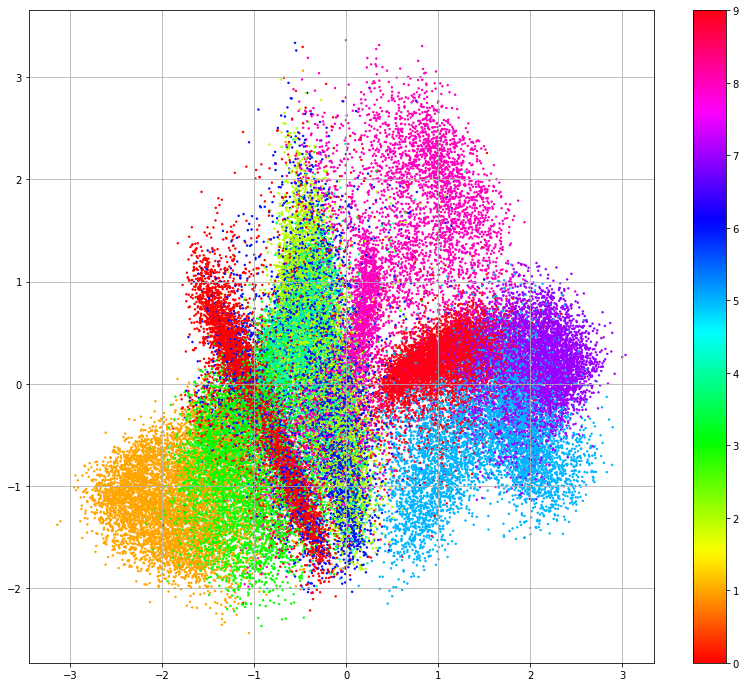

In [42]:
plt.figure(figsize=(14,12))
plt.scatter(encoded[:,0], encoded[:,1], s=2, c=y_train, cmap='hsv')
plt.colorbar()
plt.grid()
plt.show()

In [43]:
def display_image_sequence(x_start,y_start,x_end,y_end,no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

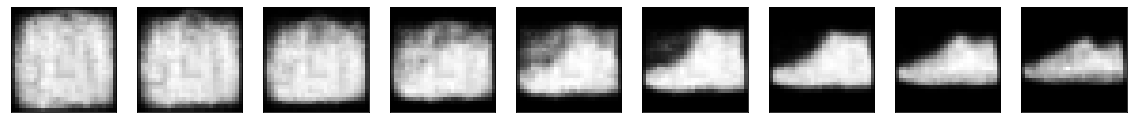

In [44]:
# Starting point=(0,2), end point=(2,0)
display_image_sequence(0,2,2,0,9)

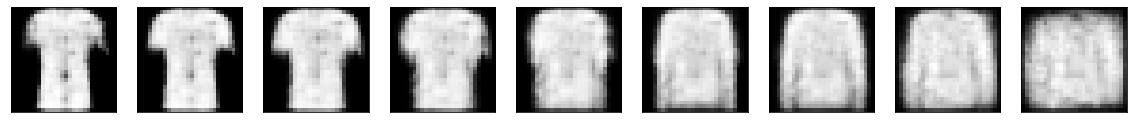

In [45]:
# Starting point=(-2,1), end point=(0,2)
display_image_sequence(-2,1,0,2,9)

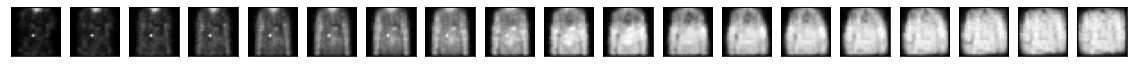

In [46]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(0,-2,0,2,19)


#Exploring latent space

The latent vector in the middle is what we want, as it is a compressed representation of the input. And the applications are plentiful such as:

Compression

Dimensionality Reduction



In [77]:
img_height   = X_train_new.shape[1]    # 28
img_width    = X_train_new.shape[2]    # 28
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim1 = 4    # Dimension of the latent space

In [78]:
latent_space = Lambda(compute_latent, output_shape=(latent_dim1,))([mu, sigma])

In [83]:
decoder_input = Input(shape=(latent_dim1,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)
decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)

In [84]:
encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)

In [86]:
vae1 = Model(encoder_input, decoder(encoder(encoder_input)))


In [87]:
vae1.compile(optimizer='adam', loss=kl_reconstruction_loss)


In [88]:
history = vae1.fit(x=X_train_new, y=X_train_new, epochs=20, batch_size=32, validation_data=(X_test_new,X_test_new))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59872/60000 [============================>.] - ETA: 0s - loss: 274.0900

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 10s 169us/sample - loss: 274.0698 - val_loss: 258.2323
Epoch 2/20
60000/60000 [==============================] - 8s 131us/sample - loss: 255.0766 - val_loss: 255.7901
Epoch 3/20
60000/60000 [==============================] - 8s 131us/sample - loss: 253.2565 - val_loss: 254.3299
Epoch 4/20
60000/60000 [==============================] - 8s 131us/sample - loss: 252.2772 - val_loss: 254.1261
Epoch 5/20
60000/60000 [==============================] - 8s 133us/sample - loss: 251.6376 - val_loss: 253.2380
Epoch 6/20
60000/60000 [==============================] - 8s 130us/sample - loss: 251.1788 - val_loss: 252.7308
Epoch 7/20
60000/60000 [==============================] - 8s 132us/sample - loss: 250.8129 - val_loss: 252.5242
Epoch 8/20
60000/60000 [==============================] - 8s 132us/sample - loss: 250.4670 - val_loss: 252.1208
Epoch 9/20
60000/60000 [==============================] - 8s 133us/sample - loss: 250.2910 - val_loss: 252.0369
Ep

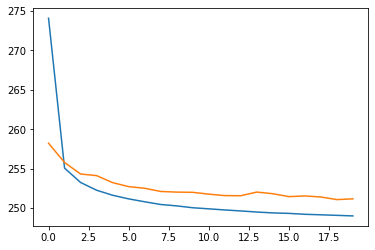

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## GANS

Generative Adversarial Networks(GAN in short) is an advancement in the field of Machine Learning which is capable of generating new data samples including Text, Audio, Images, Videos, etc. using previously available data. GANs consist of two Artificial Neural Networks or Convolution Neural Networks models namely Generator and Discriminator which are trained against each other 

How does GAN Work?
As we’ve discussed that GANs consists of two ANN or CNN models:

Generator Model: Used to generate new images which look like real images.
Discriminator Model: Used to classify images as real or fake.

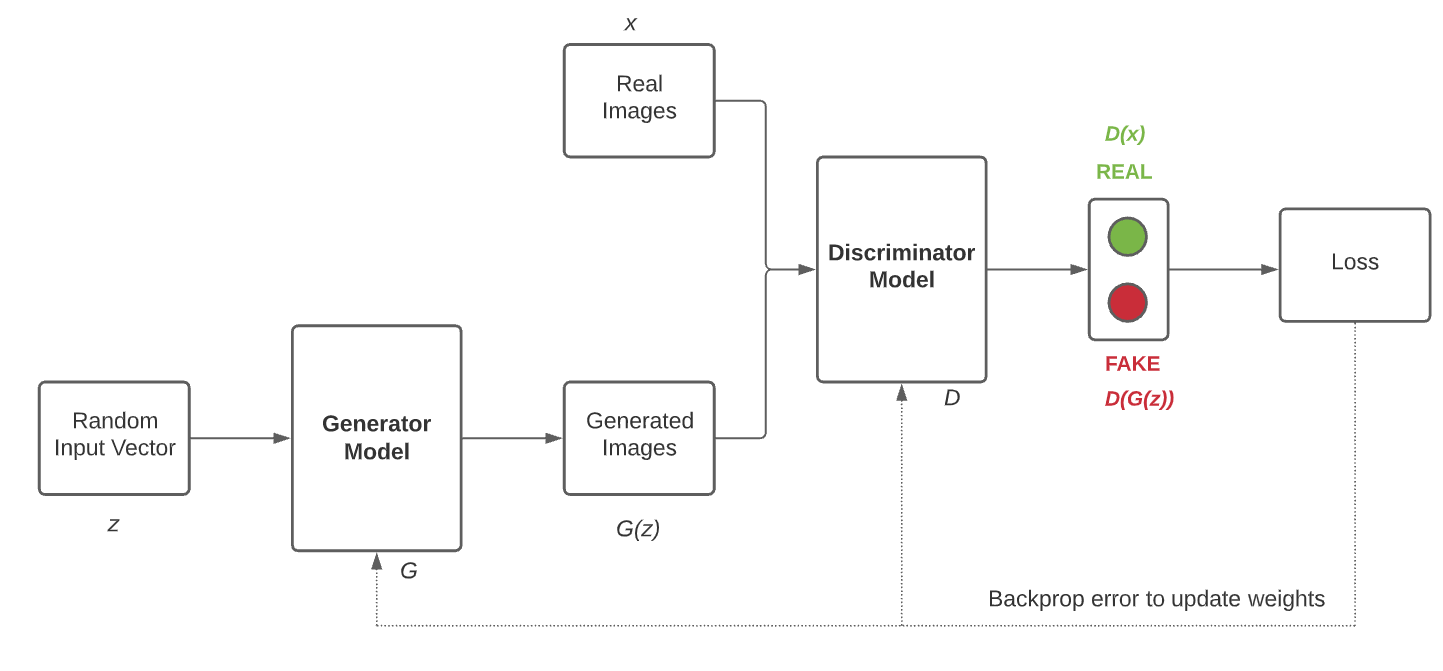

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

from google.colab import drive

In [48]:
train_data = pd.read_csv('drive/My Drive/Colab Notebooks/Fashion MNIST/fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train = train_data.drop('label',axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train=X_train.values
print(X_train.shape)

(60000, 784)


In [51]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)


(60000, 28, 28, 1)


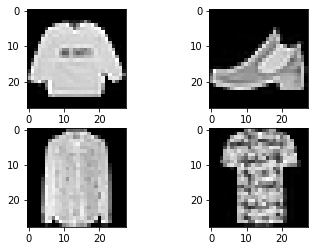

In [52]:
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [53]:
X_train =  X_train.astype('float32')


In [54]:
X_train = X_train/255
X_train = X_train*2 - 1.

In [55]:
print(X_train.max(),X_train.min())


1.0 -1.0


#Generator
 The Generator Model generates new images by taking a fixed size random noise as an input. Generated images are then fed to the Discriminator Model.

The main goal of the Generator is to fool the Discriminator by generating images that look like real images and thus makes it harder for the Discriminator to classify images as real or fake.

In [56]:
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               51712     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                        

#Discriminator 

The Discriminator Model takes an image as an input (generated and real) and classifies it as real or fake.

Generated images come from the Generator and the real images come from the training data.

The discriminator model is the simple binary classification model.

In [58]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [59]:
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 28, 28, 1)         2         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128)              

In [60]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [61]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')


In [62]:
GAN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         320656    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 242179    
                                                                 
Total params: 562,835
Trainable params: 318,864
Non-trainable params: 243,971
_________________________________________________________________


In [63]:
epochs = 30
batch_size = 100
noise_shape=100

Currently on Epoch 1


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600


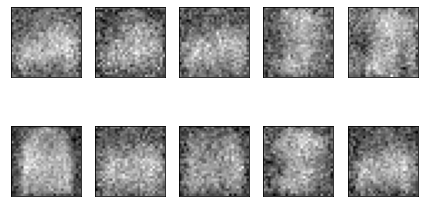

Currently on Epoch 2
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 3
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 4
	Currently on batch number 

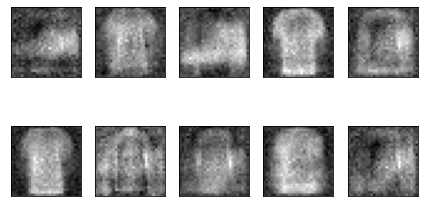

Currently on Epoch 12
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 13
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 14
	Currently on batch numb

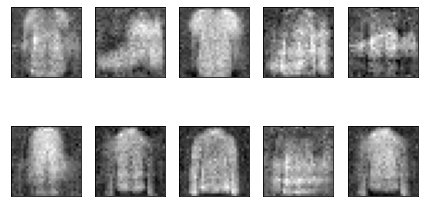

Currently on Epoch 22
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 23
	Currently on batch number 50 of 600
	Currently on batch number 100 of 600
	Currently on batch number 150 of 600
	Currently on batch number 200 of 600
	Currently on batch number 250 of 600
	Currently on batch number 300 of 600
	Currently on batch number 350 of 600
	Currently on batch number 400 of 600
	Currently on batch number 450 of 600
	Currently on batch number 500 of 600
	Currently on batch number 550 of 600
	Currently on batch number 600 of 600
Currently on Epoch 24
	Currently on batch numb

In [64]:
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
        
        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')


In [65]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)

Text(0.5, 1.0, 'How the noise looks')

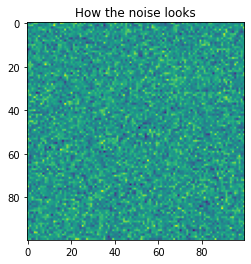

In [66]:
plt.imshow(noise)
plt.title('How the noise looks')

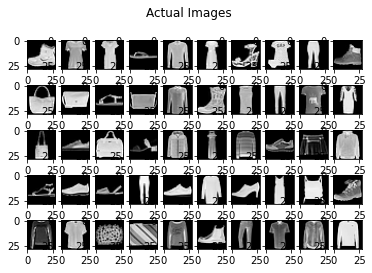

In [73]:
fig,axe=plt.subplots(5,10)
fig.suptitle("Actual Images")
idx = 0
for i in range(5):
    for j in range(10):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

#Generating 50 Fake Images

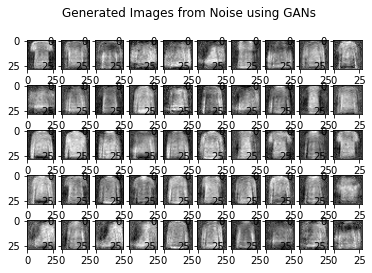

In [74]:
fig,axe=plt.subplots(5,10)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(5):
    for j in range(10):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1

#Conclusion

We have explored the working of models like Autoencoder, VAE, GANs in depth by changing network architectures and latent spaces and generated fake images.

#References:

1.Autoencoder -  https://www.kaggle.com/code/nathra/fashion-mnist-convolutional-autoencoder/notebook

2. VAE - https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d

3. Autoencoder - https://theaisummer.com/Autoencoder/

4. Dataset - https://www.kaggle.com/datasets/zalando-research/fashionmnist

5. GANs - https://www.analyticsvidhya.com/blog/2021/06/a-detailed-explanation-of-gan-with-implementation-using-tensorflow-and-keras/



#License

MIT License

Copyright (c) 2022 Poojitha Konduparti

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.